<H1> Counting Models/Discrete Distributions

This lab will cover the discrete distributions used in the analysis of RNAseq data.

## Binomial Distribution and Bernoulli Trials

One of the simplest examples in probability is the coin toss. It is an experiment with only two possible outcomes. Arbritrarily, we say that the outcome 'heads' is a 'success' and 'tails' is a 'failure'. This simple example is powerful, because many, many relevant experiments have only two possible outcomes, such as whether a person has a disease or does not or whether a component of some product is defective or not. Because such examples are common, they are given a name:

**Bernoulli trial: an experiment that has two possible outcomes, usually denoted 'success' and 'failure'. Success probability is denote $p$ and failure probability is denoted $q$ (or $1-p$).**

Often, we are interested in the result of a number of repeated, independent Bernoulli trials. The outcome of interest of such a series of trials determines a discrete probability distribution.
 

## Binomial Distribution

The binomial distribution gives the probability of $x$ number of success in $n$ Bernoulli trials. For example, suppose we want to know the probability of getting $2$ heads when tossing a *biased* coin $5$ times. First, we consider the different ways to get $2$ heads in $5$ tosses:

Outcome | Probaility
-----|-------------
HHTTT | ppqqq
HTHTT | pqpqq
HTTHT | pqqpq
HTTTH | pqqqp
THHTT | qppqq
THTHT | qpqpq
THTTH | qpqqp
TTHHT | qqppq
TTHTH | qqpqp
TTTHH | qqqpp

We can see that the right hand column of the table is the same for each outcome, i.e. $p^2q^3$. Thus, the total probaility is the number of rows (number of ways to get $2$ heads and $3$ tails) times $p^2q^3$. 

$$Pr(2 \textrm{ heads in }5 \textrm{ trials}) = 10 p^2q^2$$


In general:

$$Pr(x \textrm{ heads in }n \textrm{ trials}) = C p^xq^{n-x}$$

where $C$ is the number of ways to get $x$ heads in $n$ trials. This is simply:

$$\left(\begin{matrix}n\\x\end{matrix}\right) = \frac{n!}{x!(n-x)!}$$

## Work!

Use the R function pbinom to find the probability of getting $2$ heads in $5$ tosses for

* a fair coin
* a biased coin with P(H) = 1/3

Draw a sample of 1000 values from the binomial distribution with $10$ trials and success probability $p=.3$ and plot a histogram of the result. Do the same but change the number of trials to $100$.

Often, a normal approximation to the binomial is used. Based on the above, is this a good idea in all situations?

## Negative Binomial

While the binomial distributions models the probability of $x$ successes (events) in $n$ trials, the negative binomial models the probability of requiring $x$ trials to get $r$ successes.

$$P(X=x) = \left(\begin{matrix}x+r -1\\x-1\end{matrix}\right)p^rq^x$$

where $x = r, r+1, r+2,...$

The mean of this distribution is 

$$\mu = \frac{pr}{q}$$ 

and the variance is

$$\sigma^2 = \frac{pr}{q^2}$$

We can do a bit of algebra and come up with a slightly different parametrization:

$$\sigma^2 = \frac{pr}{q^2} = \frac{\mu}{q}$$
$$= \mu + \frac{\mu}q -\mu$$
$$= \mu + \frac{\mu}q -\frac{\mu q}q$$
$$= \mu + \frac{\mu(1-q)}q$$
$$= \mu + \frac{\mu p}q$$

and because $\frac{p}{q} =\frac{\mu}{r}$, we have:
$$\sigma^2 = \mu + \frac{\mu^2}r$$

Because the variance differs from the mean by the quantity 

$$\frac{\mu^2}{r}$$

we call this quantity the 'dispersion parameter'.


## Work !

Generate $1000$ samples from the negative binomial distribution for $10$ successes given a success probability of $0.5$ and plot a histogram. Do the same for success probability of $0.05$.

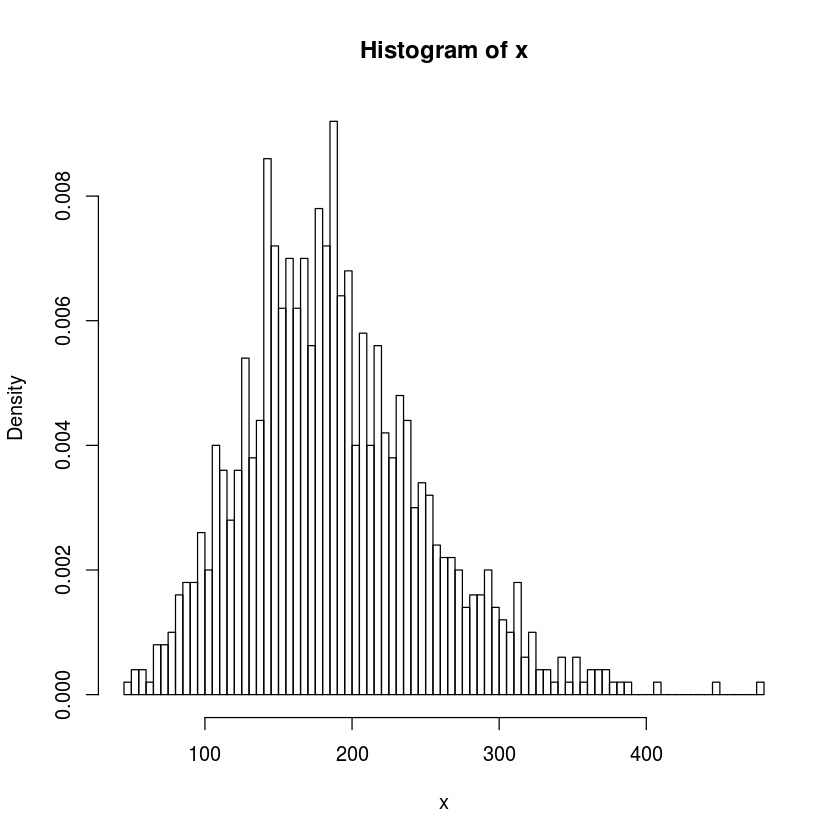

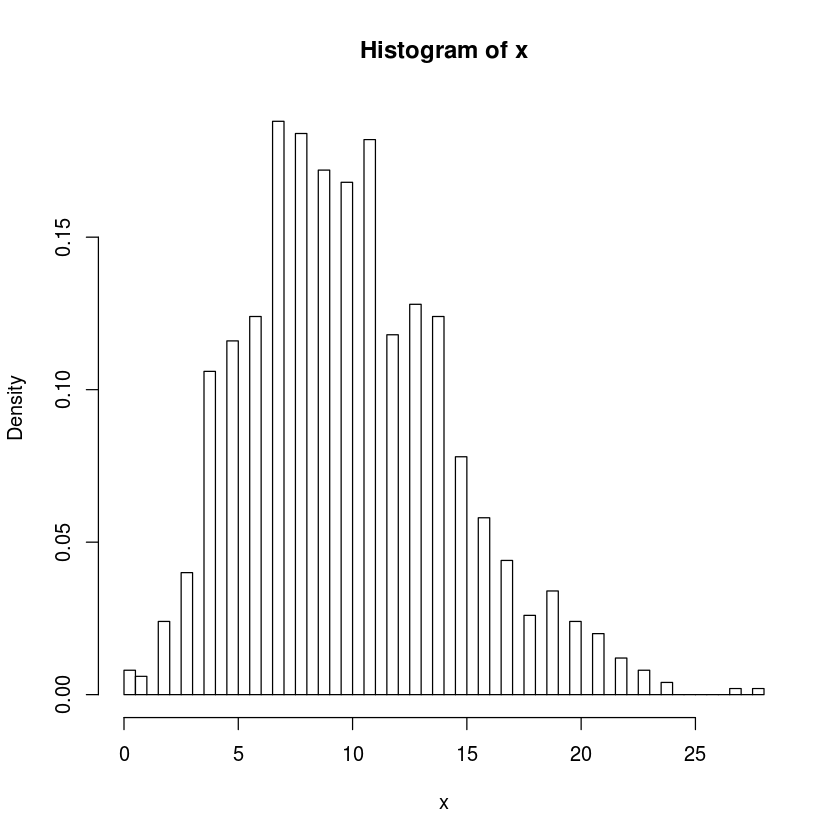

In [35]:
x<-rnbinom(1000,10,prob=.05)
hist(x,freq=FALSE,breaks=100)
x<-rnbinom(1000,10,prob=.5)
hist(x,freq=FALSE,breaks=100)

## Poisson Distribution

The Poisson distribution models the probability of $x$ events in a given time period, assuming an average rate of $\lambda$

$$P(X=x) = \frac{\lambda^xe^{-\lambda}}{x!}$$

An important thing to note is that the mean and variance of the Poisson distribution are *both* $\lambda$.

## Work!

* Suppose a manufacturer receives on average 3 orders per day. What is the probability that $5$ orders come in on a given day?

* Draw a random sample of size 1000 from a poisson distribution with parameter $\lambda = 1$ and plot a histogram of those values.

* Draw histograms for poisson distributions with parameters $\lambda = 1,4,10$

## Binomial and Poisson Distributions

In [ ]:
In this section, we explore the relationship between the Binomial and Poisson distributions.

In [12]:
n<-1000000  # Set number of trials to 1 million
p<-1/n      # Set success probability to 1/1million

In [13]:
set.seed(9988)
x=rbinom(99999,n,p)  # Simulate 999,999 iterations of 1 million trials
length(x)

[1] 99999

In [14]:
mean(x)

[1] 1.00055

In [15]:
round(dpois(0:7,lambda=1),3) # generate cdf values for poisson 

[1] 0.368 0.368 0.184 0.061 0.015 0.003 0.001 0.000

In [21]:
round(table(x)/99999,3) # Same for binomial with p<<1

x
    0     1     2     3     4     5     6 
0.004 0.004 0.002 0.001 0.000 0.000 0.000 

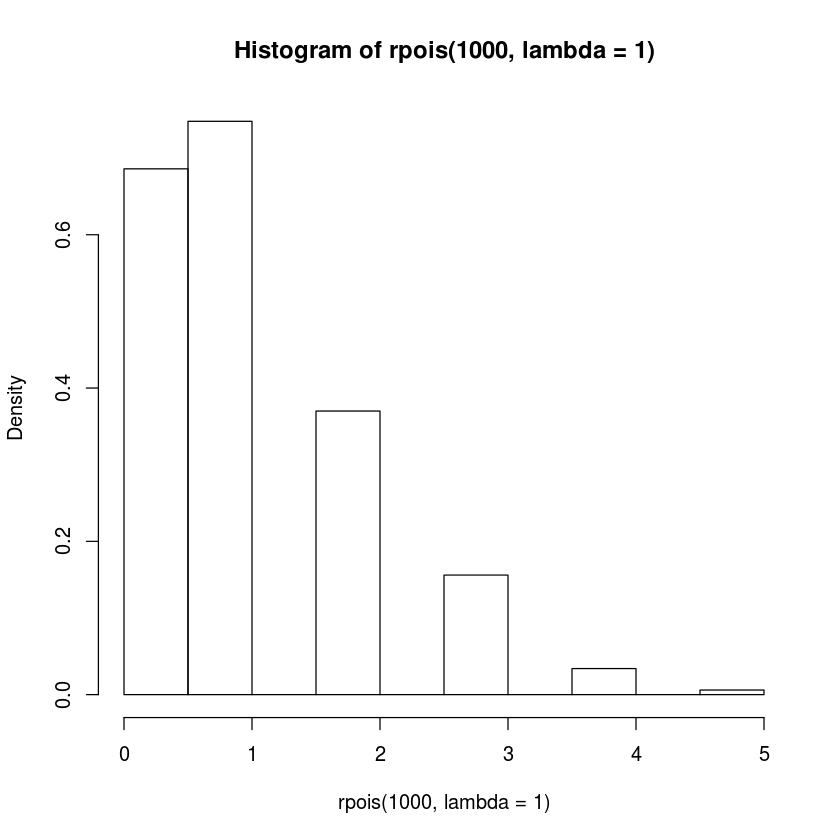

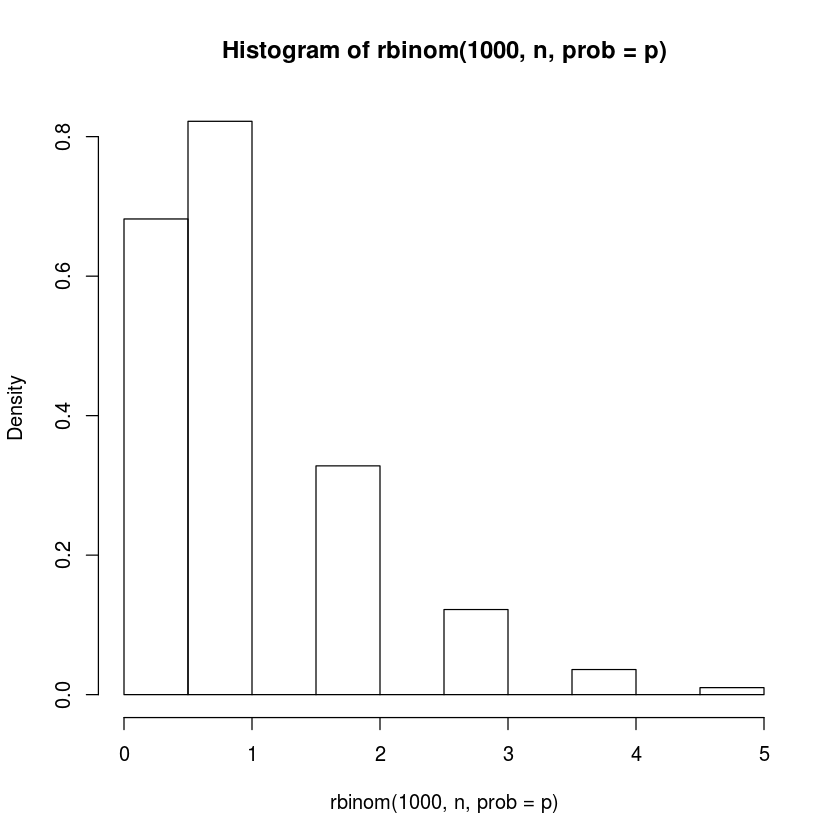

In [22]:
hist(rpois(1000,lambda=1),freq=FALSE)
hist(rbinom(1000,n,prob=p),freq=FALSE)